<a href="https://colab.research.google.com/github/l0norm/model/blob/main/baseModel_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
2+2


4

In [ ]:
import torch
import numpy as np

# TENSORS

same as numpy but more powerfull designed for deep learning
default type is float32

In [ ]:
tensor_2d = torch.randn(2,3,4)
print(tensor_2d)
tensor_2d.dtype

# tensor_2d = np1
# tensor_2d.dtype


tensor([[[ 0.8689, -0.4228,  0.9790,  0.1321],
         [ 0.1703,  0.8816, -1.4872,  1.6352],
         [-0.4646,  0.7982,  0.1221,  1.6296]],

        [[ 1.3271,  0.8426, -0.0922,  0.3551],
         [-0.0330, -1.6271, -2.2065, -0.7764],
         [ 1.1316,  0.3495, -0.8870, -0.0276]]])


torch.float32

In [ ]:
# Reshape and View
my_torch = torch.arange(15)
my_torch

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
# my_torch = my_torch.reshape(2,5)
# my_torch

my_torch = my_torch.reshape(-1)   #reshaping to 1 rwo without knowing how many collumns
my_torch

# my_torch = my_torch.reshape(2,-1) # reshaping to 2 rows without knowing number of collumns
# my_torch

my_torch = my_torch.reshape(3,-1) # cant reshape 2 rows and the elements are 15
my_torch

my_torch = my_torch.reshape(-1,5)

# MATH OPERATIONS

In [ ]:
tensor_a = torch.tensor([1,2,3,4,5])    # each item with the other array item 1 + 6
tensor_b = torch.tensor([6,7,8,9,1])

tensor_a + tensor_b
torch.add(tensor_a, tensor_b)
torch.sub(tensor_b, tensor_a)

torch.mul(tensor_a,tensor_b)
torch.div(tensor_a,tensor_b)

torch.remainder(tensor_a, tensor_b)

torch.pow(tensor_a,tensor_b)

tensor_a.add_(tensor_b)     # adds tensor_b to tensor_a

tensor([ 7,  9, 11, 13,  6])

# SIMPLE NEURAL NETWORK

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# create a model class that inherits nn.Module
class Model(nn.Module):
  # input layeer(4 features of the flower)-->
  # Hidden layer1 (number of neurons) -->
  # H2(n) -->
  # output(3 classes of iris flowers )
  def __init__(self, input_layer=4, h1=8, h2=9, output_layer=3 ): #4 input for the features ,,, 3 output for the different outputs
    super().__init__()    # initiate nn.Module
    self.fc1 = nn.Linear(input_layer, h1)   #to connect the linear layers with each other
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output_layer)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [ ]:
# start with a random number
torch.manual_seed(41)

#create an object of model
model = Model()
print(model)

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)


## input csv

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df



,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## config data

In [ ]:
#change the output from strings to int
df['variety'] = df['variety'].replace('Setosa',0.0)
df['variety'] = df['variety'].replace('Versicolor',1.0)
df['variety'] = df['variety'].replace('Virginica',2.0)
df.head()

<ipython-input-124-5073586b855c>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


now we split the features and the output

In [ ]:
#train test split to x, y
X = df.drop('variety', axis=1)
y = df['variety']

#convert it to numpy arrays
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

so we need x_train and y_train to train our data and its 80% of the csv
x_test and y_test is for evaluating the training which is 20% of the csv

this function makes it for you automatically splitting the data for you with test_size of 20%

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
# convert x features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)



## measuring the errors, how far off are the predictions

In [ ]:
criterion = nn.CrossEntropyLoss()
# choose adam optimizer , lr / learning rate so if the error doesn't go down afer some iteration
# we lower our learning rate

optimizer = torch.optim.Adam(model.parameters(), lr=0.08) #for backprobagation



In [ ]:
# training
epochs = 200
losses = []

for i in range(epochs):
  #forward and get predicted result
  y_pred = model.forward(X_train)

  # Measure the loss
  loss = criterion(y_pred, y_train) #y_pred is the prediction it made ,,y_train is the right prediction

  losses.append(loss.detach().numpy())  #appending loss in the array

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

    # do some backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0727283954620361
Epoch: 20 and loss: 1.008603572845459
Epoch: 30 and loss: 0.9425660967826843
Epoch: 40 and loss: 0.8407438397407532
Epoch: 50 and loss: 0.7798622846603394
Epoch: 60 and loss: 0.7080021500587463
Epoch: 70 and loss: 0.6543129682540894
Epoch: 80 and loss: 0.6104175448417664
Epoch: 90 and loss: 0.5780112147331238
Epoch: 100 and loss: 0.5348007082939148
Epoch: 110 and loss: 0.5090633034706116
Epoch: 120 and loss: 0.46652382612228394
Epoch: 130 and loss: 0.44030100107192993
Epoch: 140 and loss: 0.3953501284122467
Epoch: 150 and loss: 0.37072327733039856
Epoch: 160 and loss: 0.34336116909980774
Epoch: 170 and loss: 0.31148776412010193
Epoch: 180 and loss: 0.2884545624256134
Epoch: 190 and loss: 0.2536293566226959


graph visualize


Text(0.5, 0, 'epoch')

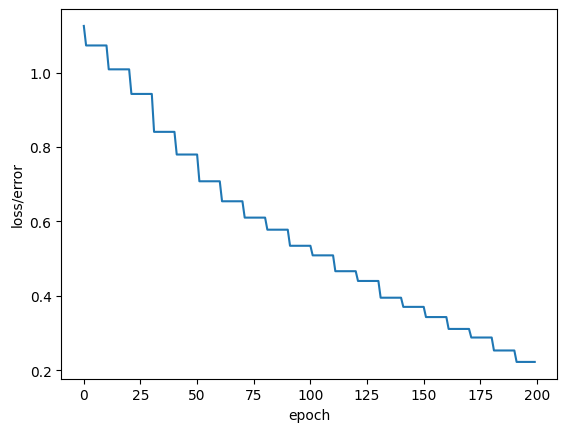

In [ ]:
plt.plot(range(epochs),losses )
plt.ylabel("loss/error")
plt.xlabel('epoch')